## B. Computational Problems

### Problem B.1

#### (a) Using the divusa data, fit a regression of with divorce as the response and unemployed, femlab, marriage, birth, and military as predictors. Compute the variance inflation factors VIFs for each $\widehat\beta_j$, $j = 1,...,p$. Is there evidence that collinearity causes some predictors not to be significant? Explain your answer.



In [1]:
library(faraway) #vif() will calculate variance inflation factors...
data(divusa)
str(divusa)

'data.frame':	77 obs. of  7 variables:
 $ year      : int  1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 ...
 $ divorce   : num  8 7.2 6.6 7.1 7.2 7.2 7.5 7.8 7.8 8 ...
 $ unemployed: num  5.2 11.7 6.7 2.4 5 3.2 1.8 3.3 4.2 3.2 ...
 $ femlab    : num  22.7 22.8 22.9 23 23.1 ...
 $ marriage  : num  92 83 79.7 85.2 80.3 79.2 78.7 77 74.1 75.5 ...
 $ birth     : num  118 120 111 110 111 ...
 $ military  : num  3.22 3.56 2.46 2.21 2.29 ...


In [2]:
lmod.1<-lm(divorce~.-year,data=divusa)

In [3]:
vif(lmod.1)

unemployed     femlab   marriage      birth   military 
  2.252888   3.613276   2.864864   2.585485   1.249596

#### Note that since the variance inflation factor shown in the above list is less than 4, we can say that there is no evidence that the collinearity makes some predictors insignificant.

In [4]:
summary(lmod.1)


Call:
lm(formula = divorce ~ . - year, data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8611 -0.8916 -0.0496  0.8650  3.8300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.48784    3.39378   0.733   0.4659    
unemployed  -0.11125    0.05592  -1.989   0.0505 .  
femlab       0.38365    0.03059  12.543  < 2e-16 ***
marriage     0.11867    0.02441   4.861 6.77e-06 ***
birth       -0.12996    0.01560  -8.333 4.03e-12 ***
military    -0.02673    0.01425  -1.876   0.0647 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.65 on 71 degrees of freedom
Multiple R-squared:  0.9208,	Adjusted R-squared:  0.9152 
F-statistic: 165.1 on 5 and 71 DF,  p-value: < 2.2e-16


In [5]:
lmod.1 = update(lmod.1, . ~ . -military)
summary(lmod.1)


Call:
lm(formula = divorce ~ unemployed + femlab + marriage + birth, 
    data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8559 -0.9217 -0.0119  0.9055  4.0391 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.61346    3.45201   0.757    0.451    
unemployed  -0.08613    0.05524  -1.559    0.123    
femlab       0.38004    0.03106  12.237  < 2e-16 ***
marriage     0.10925    0.02431   4.495 2.61e-05 ***
birth       -0.12782    0.01582  -8.078 1.10e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.679 on 72 degrees of freedom
Multiple R-squared:  0.9169,	Adjusted R-squared:  0.9123 
F-statistic: 198.6 on 4 and 72 DF,  p-value: < 2.2e-16


In [6]:
vif(lmod.1)

unemployed     femlab   marriage      birth 
  2.123735   3.598997   2.743709   2.571650

In [7]:
lmod.1 = update(lmod.1, . ~ . -unemployed)
summary(lmod.1)


Call:
lm(formula = divorce ~ femlab + marriage + birth, data = divusa)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6923 -1.1934 -0.0534  1.2265  3.6701 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.54545    2.21247  -0.699    0.487    
femlab       0.41337    0.02275  18.174  < 2e-16 ***
marriage     0.12609    0.02199   5.735 2.07e-07 ***
birth       -0.11627    0.01412  -8.235 5.10e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.695 on 73 degrees of freedom
Multiple R-squared:  0.9141,	Adjusted R-squared:  0.9106 
F-statistic: 258.9 on 3 and 73 DF,  p-value: < 2.2e-16


In [8]:
vif(lmod.1)

femlab marriage    birth 
1.893390 2.201891 2.008469

#### (b) Does the removal of insignificant predictors from the model reduce the collinearity? Investigate.

#### Note that we removed the insignificant factors. This led to making the VIF better. In short, yes the removal of insignificant predictors from the model reduce the collinearity.

### Problem B.2

The salmonella data was collected in a salmonella reverse mutagenicity assay. The predictor is the dose level of quinoline and the response is the numbers of revertant colonies of TA98 salmonella observed on each of three replicate plates. 

#### (a) Show that a Poisson GLM is inadequate and that some overdispersion must be allowed for. 

In [9]:
library(faraway)
data(salmonella)
head(salmonella)


colonies,dose
15,0
21,0
29,0
16,10
18,10
21,10


In [10]:
lmod.2<-glm(formula=colonies~dose,family=poisson(link='log'),data = salmonella)
summary(lmod.2)


Call:
glm(formula = colonies ~ dose, family = poisson(link = "log"), 
    data = salmonella)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6482  -1.8225  -0.2993   1.2917   5.1861  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 3.3219950  0.0540292  61.485   <2e-16 ***
dose        0.0001901  0.0001172   1.622    0.105    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 78.358  on 17  degrees of freedom
Residual deviance: 75.806  on 16  degrees of freedom
AIC: 172.34

Number of Fisher Scoring iterations: 4


In [11]:
drop1(lmod.2,test='F')

Warning message in drop1.glm(lmod.2, test = "F"):
"F test assumes 'quasipoisson' family"

,Df,Deviance,AIC,F value,Pr(>F)
<none>,NA,75.80589,172.3421,NA,NA
dose,1,78.35758,172.8938,0.5385732,0.4736424


#### Based on the above lmod 2 summary, we can see that the over-dispersion is fixed to 1. If the overdispersion is fixed to 1, then the p-value is 0.105. However, when we run the F-test, the p-value increased to 0.4736. This shows us that we must allow for over-dispersion.

#### (b) Estimate the overdispersion parameter and adjust the standard errors accordingly. 

In [12]:
dp <- sum(resid(lmod.2,type='pearson')^2)/lmod.2$df.residual
summary(lmod.2,dispersion=dp)


Call:
glm(formula = colonies ~ dose, family = poisson(link = "log"), 
    data = salmonella)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6482  -1.8225  -0.2993   1.2917   5.1861  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) 3.3219950  0.1218626  27.260   <2e-16 ***
dose        0.0001901  0.0002644   0.719    0.472    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for poisson family taken to be 5.087258)

    Null deviance: 78.358  on 17  degrees of freedom
Residual deviance: 75.806  on 16  degrees of freedom
AIC: 172.34

Number of Fisher Scoring iterations: 4


### Problem B.3


Consider the fat dataset, with percentage of body fat, siri, as the response and the other variables, except brozek and density, as potential predictors. 

#### Remove every tenth observation from the data for use as a test sample. Use the remaining data as a training sample building the following models:

1. Linear regression with all mentioned predictors.
2. Linear regression with variables selected using AIC.
3. Principal component regression.
4. Ridge regression.

#### Use the models you find to predict the response in the test sample. Make a report on the performance of the models. 

In [14]:
library(leaps)
library(MASS)
library(ridge)

Warning message:
"package 'ridge' was built under R version 3.5.3"

In [16]:
data(fat)
str(fat)

'data.frame':	252 obs. of  18 variables:
 $ brozek : num  12.6 6.9 24.6 10.9 27.8 20.6 19 12.8 5.1 12 ...
 $ siri   : num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ density: num  1.07 1.09 1.04 1.08 1.03 ...
 $ age    : int  23 22 22 26 24 24 26 25 25 23 ...
 $ weight : num  154 173 154 185 184 ...
 $ height : num  67.8 72.2 66.2 72.2 71.2 ...
 $ adipos : num  23.7 23.4 24.7 24.9 25.6 26.5 26.2 23.6 24.6 25.8 ...
 $ free   : num  135 161 116 165 133 ...
 $ neck   : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ chest  : num  93.1 93.6 95.8 101.8 97.3 ...
 $ abdom  : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ hip    : num  94.5 98.7 99.2 101.2 101.9 ...
 $ thigh  : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ knee   : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ankle  : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ biceps : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ forearm: num  27.4 28.9 25.2

In [18]:
indices_test <- seq(10, nrow(fat), 10)
test <- fat[indices_test,]
train <- fat[-indices_test, ]

X_train <- train[, 4:ncol(train)]
y_train <- train$siri

scaled_y_train <- (y_train - mean(train$siri))/sd(train$siri)
scaled_X_train <- scale(X_train, colMeans(X_train), apply(X_train, 2, sd))

train_scaled <- as.data.frame(cbind(siri=scaled_y_train, scaled_X_train))

X_test <- test[, 4:ncol(test)]
y_test <- test$siri

scaled_X_test <- scale(X_test, colMeans(X_train), apply(X_train, 2, sd))
scaled_y_test <- (y_test-mean(y_train))/sd(y_train)

test_scaled <- as.data.frame(cbind(siri=scaled_y_test, scaled_X_test))

In [19]:
x = regsubsets(siri~ .-density-brozek,data=train,nvmax=ncol(train)-3)
x.1 = summary(x)
x.1$which

,(Intercept),age,weight,height,adipos,free,neck,chest,abdom,hip,thigh,knee,ankle,biceps,forearm,wrist
1,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
4,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE
5,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE
6,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
7,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
8,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE
9,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE
10,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE


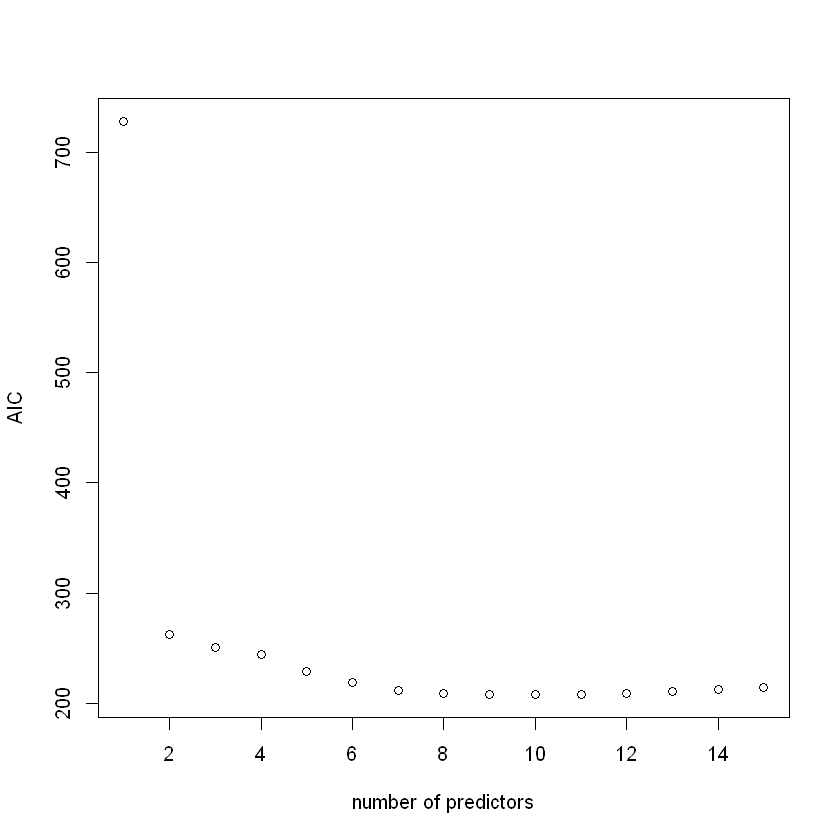

In [21]:
n = nrow(train)
AIC = n*log(x.1$rss/n) + 2*(2:16)
plot(AIC ~ I(1:15), xlab = "number of predictors", ylab = "AIC")

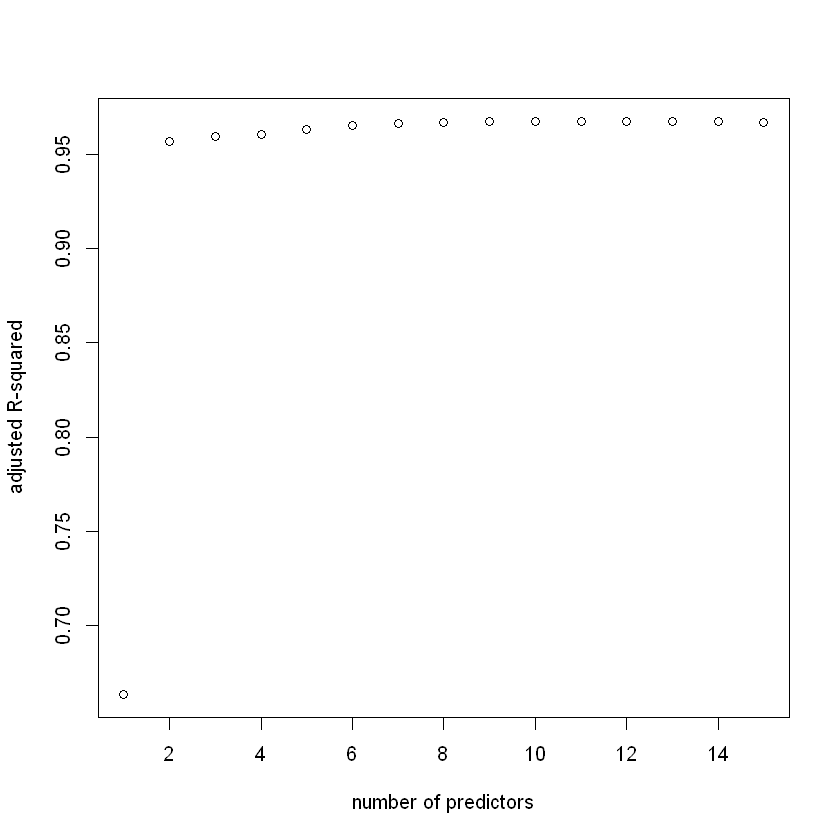

In [22]:
plot(1:15, x.1$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In [25]:
a <- which.min(AIC)
a

[1] 10

#### The optimal number of prdictors is 10

In [26]:
s <- prcomp(train[, 4:ncol(train)], scale=T)
summary(s)

Importance of components:
                         PC1    PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     3.072 1.2415 1.04228 0.82869 0.77340 0.60565 0.57145
Proportion of Variance 0.629 0.1028 0.07242 0.04578 0.03988 0.02445 0.02177
Cumulative Proportion  0.629 0.7317 0.80414 0.84992 0.88980 0.91425 0.93602
                           PC8     PC9    PC10    PC11   PC12    PC13    PC14
Standard deviation     0.52205 0.44467 0.42667 0.35774 0.2765 0.21504 0.19703
Proportion of Variance 0.01817 0.01318 0.01214 0.00853 0.0051 0.00308 0.00259
Cumulative Proportion  0.95419 0.96738 0.97951 0.98804 0.9931 0.99622 0.99881
                          PC15
Standard deviation     0.13350
Proportion of Variance 0.00119
Cumulative Proportion  1.00000

In [27]:
lmod <- lm(siri ~ . - brozek-density, data=train)
lmod_AIC <- lm(siri ~ . - brozek-density-age-height-neck-hip-wrist, data=train)
lmod_PCA <- lm(siri ~ ., data=as.data.frame(cbind(siri=train$siri, s$x)))
lmod_ridge <- linearRidge(siri ~., data=train_scaled, lambda=0.1, scaling='scale')

In [28]:
PC_test <- scale(X_test, s$center, s$scale) %*% s$rotation 
s_test <- as.data.frame(cbind(siri=y_test, PC_test))
y_pred_PCA <- predict(lmod_PCA, s_test)
y_pred_lm <- predict(lmod, test)
y_pred_lmAIC <- predict(lmod_AIC, test)
y_pred_ridge <- predict(lmod_ridge, test_scaled)
mse_PCA <- mean((y_test-y_pred_PCA)^2) 
mse_lm <- mean((y_test-y_pred_lm)^2)
mse_lmAIC <- mean((y_test-y_pred_lmAIC)^2)
mse_ridge <- mean((y_test-((y_pred_ridge*sd(y_train))+mean(y_train)))^2)
report <- data.frame(Model=c('PCA', 'Linear regression', 'AIC', 'Rigde regression'), 
                     MSE_test_set=c(mse_PCA, mse_lm, mse_lmAIC, mse_ridge))
report

Model,MSE_test_set
PCA,1.280357
Linear regression,1.280357
AIC,1.258928
Rigde regression,1.264545


### Problem B.4

Use the peatpos data with hipcenter as the response.

#### (a) Fit a model with all eight predictors. Comment on the effect of leg length on the response. 

In [39]:
data(seatpos)

In [40]:
lmod.seat<-lm(seatpos$hipcenter~.,data=seatpos)
summary(lmod.seat)


Call:
lm(formula = seatpos$hipcenter ~ ., data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-73.827 -22.833  -3.678  25.017  62.337 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 436.43213  166.57162   2.620   0.0138 *
Age           0.77572    0.57033   1.360   0.1843  
Weight        0.02631    0.33097   0.080   0.9372  
HtShoes      -2.69241    9.75304  -0.276   0.7845  
Ht            0.60134   10.12987   0.059   0.9531  
Seated        0.53375    3.76189   0.142   0.8882  
Arm          -1.32807    3.90020  -0.341   0.7359  
Thigh        -1.14312    2.66002  -0.430   0.6706  
Leg          -6.43905    4.71386  -1.366   0.1824  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 37.72 on 29 degrees of freedom
Multiple R-squared:  0.6866,	Adjusted R-squared:  0.6001 
F-statistic:  7.94 on 8 and 29 DF,  p-value: 1.306e-05


#### Based on the regression output shown above, leg is not a significant factor and it has a negative impact on the prediction. 

#### (b) Compute a 95% prediction interval for the response at the mean value of the predictors. 

In [41]:
newdata<-data.frame("Weight"=mean(seatpos$Weight),"Age"=mean(seatpos$Age),"HtShoes"=mean(seatpos$HtShoes),"Ht"=mean(seatpos$Ht),"Seated"=mean(seatpos$Seated),"Arm"=mean(seatpos$Arm),"Thigh"=mean(seatpos$Thigh),"Leg"=mean(seatpos$Leg))
predict(lmod.seat, newdata = newdata, interval = 'prediction')

,fit,lwr,upr
1,-164.8849,-243.04,-86.72972


#### (c) Use AIC to select a model. Now interpret the effect of leg length and compute the prediction interval. Compare the conclusions from the two models. 

In [42]:
lmod.reg = regsubsets(hipcenter ~ .,data=seatpos,nvmax=ncol(seatpos)-1)
rs = summary(lmod.reg)
rs$which

,(Intercept),Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
3,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE
4,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE
5,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
6,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


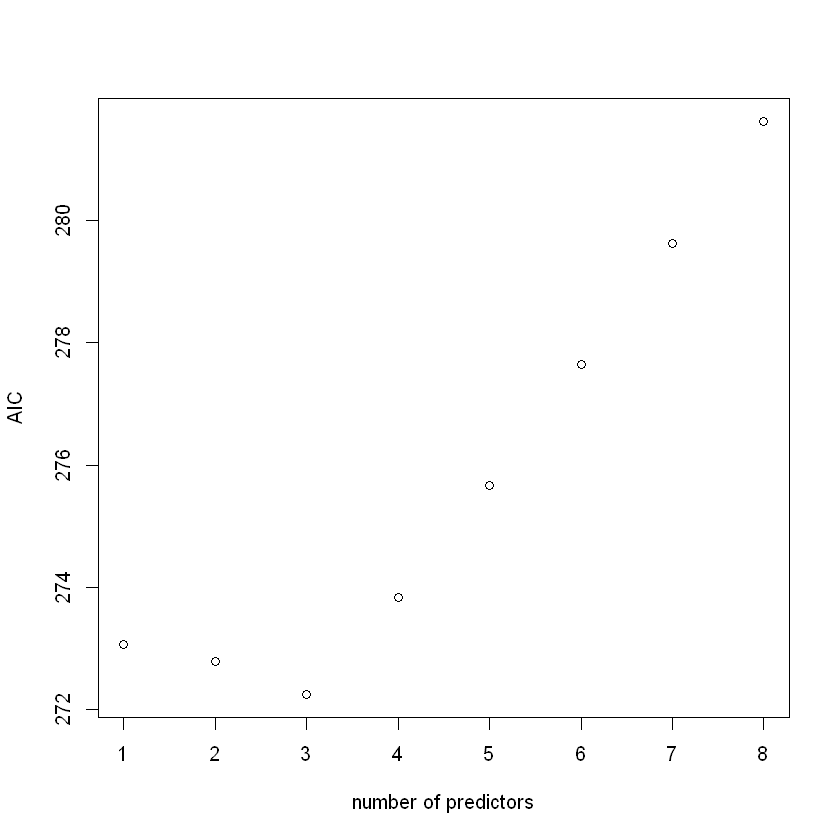

In [43]:
n = nrow(seatpos)
AIC = n*log(rs$rss/n) + 2*(1:8)
plot(AIC ~ I(1:8), xlab = "number of predictors", ylab = "AIC")

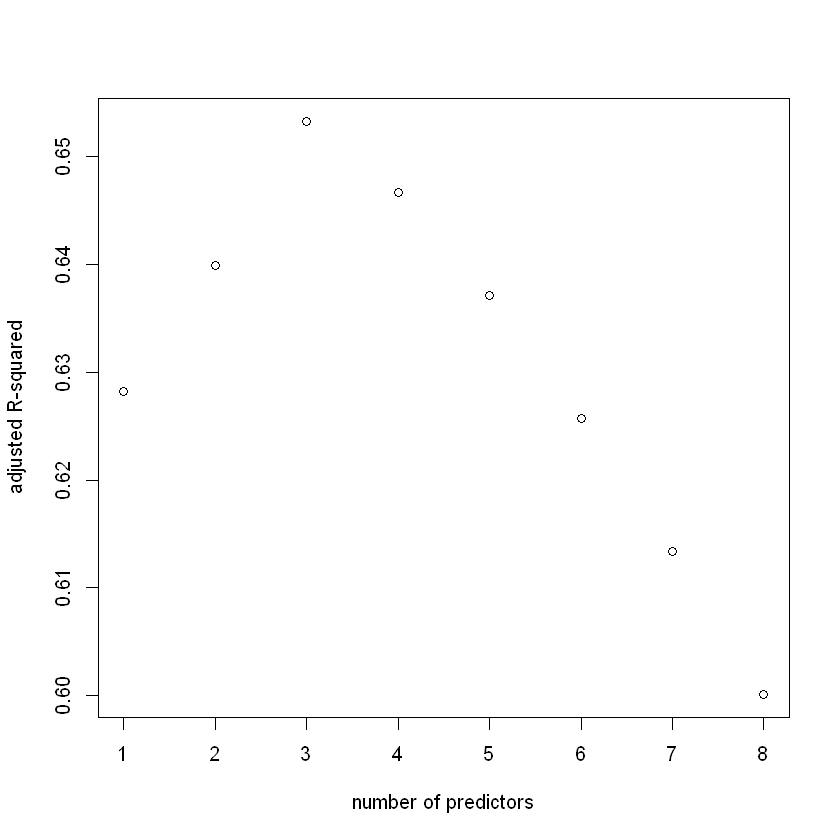

In [44]:
plot(1:8, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In [45]:
a<-which.min(AIC)
a

[1] 3

#### The best number of predictors are 3 

In [46]:
lmod <- lm(hipcenter ~ Age + Ht + Leg, data=seatpos)
summary(lmod)


Call:
lm(formula = hipcenter ~ Age + Ht + Leg, data = seatpos)

Residuals:
    Min      1Q  Median      3Q     Max 
-79.715 -22.758  -4.102  21.394  60.576 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 452.1976   100.9482   4.480 8.04e-05 ***
Age           0.5807     0.3790   1.532   0.1347    
Ht           -2.3254     1.2545  -1.854   0.0725 .  
Leg          -6.7390     4.1050  -1.642   0.1099    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 35.12 on 34 degrees of freedom
Multiple R-squared:  0.6814,	Adjusted R-squared:  0.6533 
F-statistic: 24.24 on 3 and 34 DF,  p-value: 1.426e-08


#### We can consider the above model as good as now we can see that the predictor leg is more significant now. 

In [48]:
data<-data.frame("Age"=mean(seatpos$Age),"Ht"=mean(seatpos$Ht),"Leg"=mean(seatpos$Leg))
predict(lmod, newdata=data, interval="prediction", level=0.95)

,fit,lwr,upr
1,-164.8849,-237.192,-92.57771


#### We can now conclude that AIC signifies that leg is important in the model.

### Problem B.5

#### Use the teengamb data with gamble as the response and the other variables as predictors. Implement the following variable selection methods to determine the "best" model:

1. Backward Elimination
2. AIC
3. Adjusted $R^2$.

In [29]:
data(teengamb)

In [30]:
lmod.gamb<-lm(gamble~.,data=teengamb)
summary(lmod.gamb)


Call:
lm(formula = gamble ~ ., data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.082 -11.320  -1.451   9.452  94.252 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.55565   17.19680   1.312   0.1968    
sex         -22.11833    8.21111  -2.694   0.0101 *  
status        0.05223    0.28111   0.186   0.8535    
income        4.96198    1.02539   4.839 1.79e-05 ***
verbal       -2.95949    2.17215  -1.362   0.1803    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.69 on 42 degrees of freedom
Multiple R-squared:  0.5267,	Adjusted R-squared:  0.4816 
F-statistic: 11.69 on 4 and 42 DF,  p-value: 1.815e-06


# Backward elimination

In [31]:
lmod.gamb = update(lmod.gamb, . ~ . - status)
summary(lmod.gamb)


Call:
lm(formula = gamble ~ sex + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.639 -11.765  -1.594   9.305  93.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1390    14.7686   1.634   0.1095    
sex         -22.9602     6.7706  -3.391   0.0015 ** 
income        4.8981     0.9551   5.128 6.64e-06 ***
verbal       -2.7468     1.8253  -1.505   0.1397    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.43 on 43 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.4933 
F-statistic: 15.93 on 3 and 43 DF,  p-value: 4.148e-07


# Best model (After Backward Elimination)

In [32]:
lmod.gamb = update(lmod.gamb, . ~ . - verbal)
summary(lmod.gamb)


Call:
lm(formula = gamble ~ sex + income, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-49.757 -11.649   0.844   8.659 100.243 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    4.041      6.394   0.632  0.53070    
sex          -21.634      6.809  -3.177  0.00272 ** 
income         5.172      0.951   5.438 2.24e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.75 on 44 degrees of freedom
Multiple R-squared:  0.5014,	Adjusted R-squared:  0.4787 
F-statistic: 22.12 on 2 and 44 DF,  p-value: 2.243e-07


# AIC

In [33]:
lmod.reg = regsubsets(gamble ~ .,data=teengamb,nvmax=ncol(teengamb)-1)
rs = summary(lmod.reg)
rs$which

,(Intercept),sex,status,income,verbal
1,TRUE,FALSE,FALSE,TRUE,FALSE
2,TRUE,TRUE,FALSE,TRUE,FALSE
3,TRUE,TRUE,FALSE,TRUE,TRUE
4,TRUE,TRUE,TRUE,TRUE,TRUE


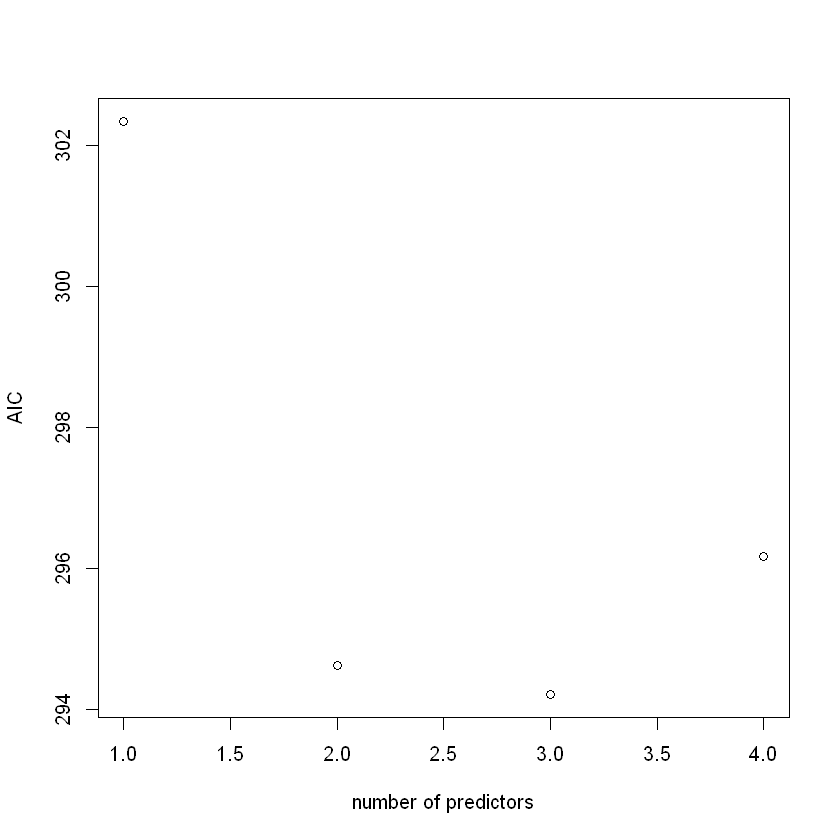

In [34]:
n = nrow(teengamb)
AIC = n*log(rs$rss/n) + 2*(1:4)
plot(AIC ~ I(1:4), xlab = "number of predictors", ylab = "AIC")

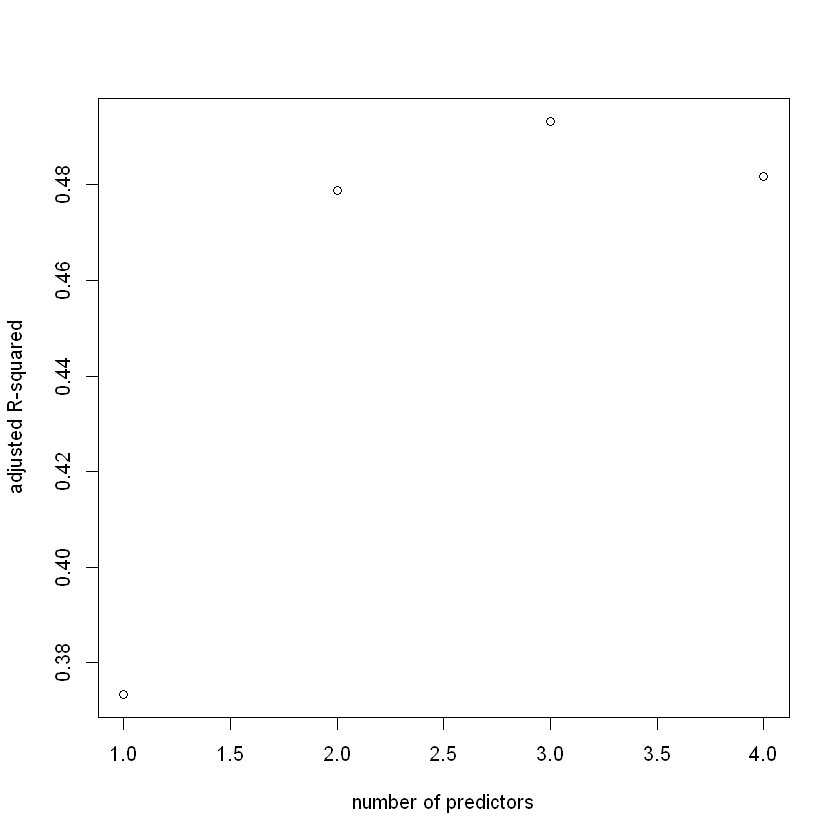

In [35]:
plot(1:4, rs$adjr2, xlab = "number of predictors", ylab = "adjusted R-squared")

In [36]:
a<-which.min(AIC)
a

[1] 3

#### After performing the AIC analysis, we can conclude that the best model is the model which contains the following predictors (sex, income and verbal)

In [37]:
lmod <- lm(gamble ~ .-status, data=teengamb)
summary(lmod)


Call:
lm(formula = gamble ~ . - status, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.639 -11.765  -1.594   9.305  93.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1390    14.7686   1.634   0.1095    
sex         -22.9602     6.7706  -3.391   0.0015 ** 
income        4.8981     0.9551   5.128 6.64e-06 ***
verbal       -2.7468     1.8253  -1.505   0.1397    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.43 on 43 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.4933 
F-statistic: 15.93 on 3 and 43 DF,  p-value: 4.148e-07


# R-squared value

In [38]:
summary(lm(gamble ~ sex+income+verbal, data=teengamb))


Call:
lm(formula = gamble ~ sex + income + verbal, data = teengamb)

Residuals:
    Min      1Q  Median      3Q     Max 
-50.639 -11.765  -1.594   9.305  93.867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  24.1390    14.7686   1.634   0.1095    
sex         -22.9602     6.7706  -3.391   0.0015 ** 
income        4.8981     0.9551   5.128 6.64e-06 ***
verbal       -2.7468     1.8253  -1.505   0.1397    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 22.43 on 43 degrees of freedom
Multiple R-squared:  0.5263,	Adjusted R-squared:  0.4933 
F-statistic: 15.93 on 3 and 43 DF,  p-value: 4.148e-07


#### As shown above in the adjusted R-square plot, good number of predictors will be 3. 